# Pattern Recognition Assignment 4.

## Μωράτης Κωνσταντίνος, 9589.

In [143]:
# installing necessary packages
!pip install keras
!pip install tensorflow

Check for missing values
0    0
1    0
2    0
dtype: int64


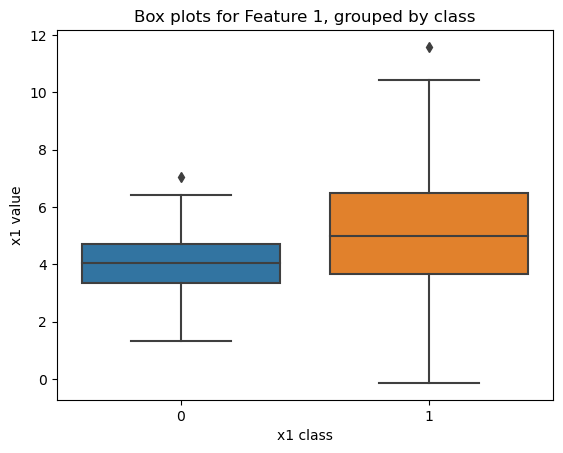

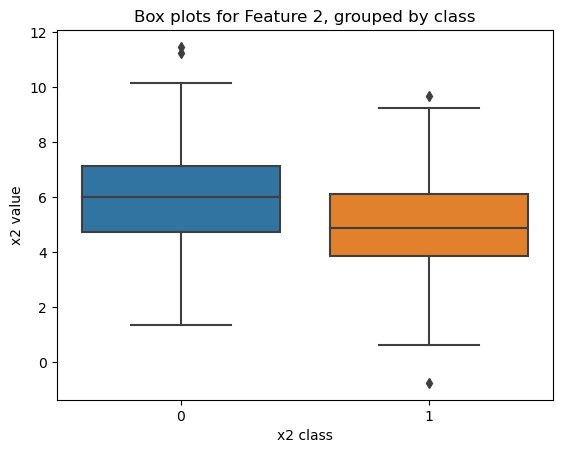

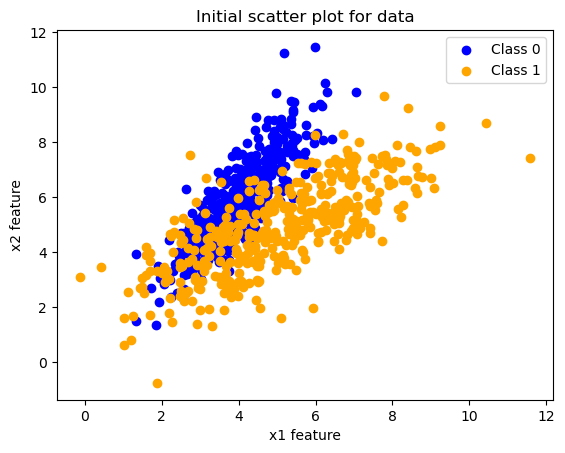

In [144]:
# Reading data from csv file and data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Dataset.csv', header = None)
class0_data = df[df[2] == 0].to_numpy()
class1_data = df[df[2] == 1].to_numpy()

# Check for missing values
print("Check for missing values")
print(df.isnull().sum()) 

# Create box plots for feature1, grouped by class to check data distribution and outliers
plt.figure(1)
sns.boxplot(x=2, y=0, data=df)
plt.xlabel("x1 class")
plt.ylabel("x1 value")
plt.title("Box plots for Feature 1, grouped by class")

# Create box plots for feature2, grouped by class to check data distribution and outliers
plt.figure(2)
sns.boxplot(x=2, y=1, data=df)
plt.xlabel("x2 class")
plt.ylabel("x2 value")
plt.title("Box plots for Feature 2, grouped by class")

# Creating a scatter plot for data visualization
plt.figure(3)
plt.scatter(class0_data[:,0], class0_data[:,1], color='blue', label='Class 0')
plt.scatter(class1_data[:,0], class1_data[:,1], color='orange', label='Class 1')
plt.xlabel("x1 feature")
plt.ylabel("x2 feature")
plt.title("Initial scatter plot for data")
plt.legend()


plt.show()


In [145]:
# Create a function to split data to train and validation set
# Also it performs MinMaxScalling to the X data

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# funcion for scaling X data in range(0,1)
def scaleDataset(dataset):
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    dataset_scaled = scaler.fit_transform(dataset)
    return dataset_scaled

#function for spliting Dataset to X_train, y_train and X_valid, y_valid for model training and validation
def splitDataset(df):
    X_train, X_valid, y_train, y_valid = train_test_split(df.loc[:,0:1], df.loc[:,2], 
                                                    test_size=0.2, 
                                                    shuffle=True)
    y_train = y_train.to_numpy()
    y_valid = y_valid.to_numpy()

    X_train = scaleDataset(X_train)
    X_valid = scaleDataset(X_valid)
    return X_train, X_valid, y_train, y_valid
    

X_train, X_valid, y_train, y_valid = splitDataset(df)
print(X_train)

[[0.32596023 0.47386227]
 [0.4331838  0.71729343]
 [0.50065576 0.65286074]
 ...
 [0.28302581 0.40042903]
 [0.40019874 0.63505147]
 [0.24078887 0.43497139]]


In [146]:
# Implementing different classsification models and calculating metrics
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

# Create a function that trains different classification models
def train_models(input_X_train, input_y_train, input_X_test, input_y_test):
    models = {}
    
    # Multinomial Naive Bayes
    models['Multinomial NB'] = MultinomialNB()
    
    # Gaussian Naive Bayes
    models['Gaussian NB'] = GaussianNB()
    
    # Decision Trees
    models['Decision Trees'] = DecisionTreeClassifier()
    
    accuracy, precision, recall, f1 = {}, {}, {}, {}
    
    for key in models.keys():
        print("\n --- Current model:", key, " ---\n")
      
        # Fit the classifier
        models[key].fit(input_X_train, input_y_train)
      
        # Make predictions
        predictions = models[key].predict(input_X_test)
      
        # Calculate metrics
        accuracy[key] = metrics.accuracy_score(predictions, input_y_test)
        precision[key] = metrics.precision_score(predictions, input_y_test)
        recall[key] = metrics.recall_score(predictions, input_y_test)
        f1[key] = metrics.f1_score(predictions, input_y_test)

    # Display metrics
    df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1'])
    df_model['Accuracy'] = accuracy.values()
    df_model['Precision'] = precision.values()
    df_model['Recall'] = recall.values()
    df_model['F1'] = f1.values()

    df_model = df_model.round(4) * 100

    display(df_model)
    ax = df_model.plot.bar(rot=60)
    ax.legend(
        ncol=len(models.keys()), 
        bbox_to_anchor=(0, 1), 
        loc='lower left', 
        prop={'size': 12}
    )
    plt.tight_layout()

    return df_model


 --- Current model: Multinomial NB  ---


 --- Current model: Gaussian NB  ---


 --- Current model: Decision Trees  ---



,Accuracy,Precision,Recall,F1
Multinomial NB,86.88,79.27,94.20,86.09
Gaussian NB,76.25,87.80,72.00,79.12
Decision Trees,71.25,89.02,66.36,76.04


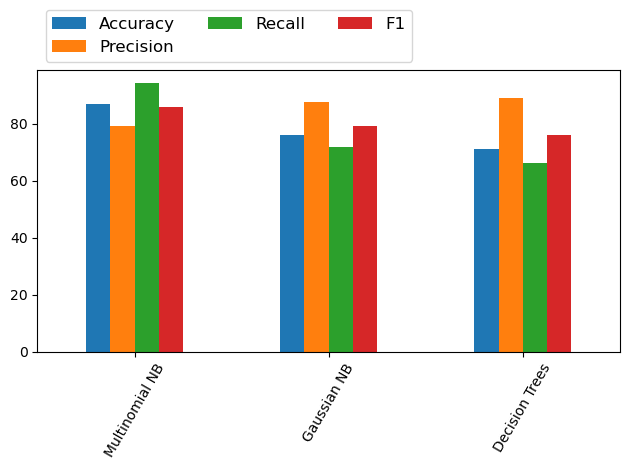

In [147]:
# Train models 
CV_results = train_models(X_train, y_train, X_valid, y_valid)

In [148]:
# Create a function that trains different machine learning models with cross validation
from sklearn.model_selection import cross_validate
import statistics

# Same as before, using cross validation
def train_models_cv(input_X_train, input_y_train, input_X_test, input_y_test):
    models = {}
    
    models['Multinomial NB'] = MultinomialNB()
    
    models['Gaussian NB'] = GaussianNB()
    
    models['Decision Trees'] = DecisionTreeClassifier()
    
    cv_results = {}
    
    accuracy, precision, recall, f1 = {}, {}, {}, {}
    
    for key in models.keys():
        cv_results[key] = cross_validate(models[key], 
                                         X_train, 
                                         y_train, 
                                         cv=10
                                        )
        
    for key in models.keys():
        print("\n --- Current model:", key, " ---\n")
        print("Mean score from 10 cross validation trainings:")
        display(statistics.mean(cv_results[key]['test_score']))


In [149]:
# Train models with cv
CV_results = train_models_cv(X_train, y_train, X_valid, y_valid)


 --- Current model: Multinomial NB  ---

Mean score from 10 cross validation trainings:


0.7765625


 --- Current model: Gaussian NB  ---

Mean score from 10 cross validation trainings:


0.7796875


 --- Current model: Decision Trees  ---

Mean score from 10 cross validation trainings:


0.7953125

In [157]:
import numpy as np
import keras

# define the model
# The newral network has 1 input layer and 7 hidden layers
n_epochs = 50
model = keras.Sequential()
model.add(keras.layers.Dense(units=1024, activation='relu', input_dim=X_train.shape[1]))
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=32, activation='relu'))
model.add(keras.layers.Dense(units=16, activation='relu'))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

# compile the model
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

# fit the model to the training data, shuffling the data and labels before each epoch
for epoch in range(n_epochs):
    shuffle_indices = np.arange(len(X_train))
    np.random.shuffle(shuffle_indices)
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]
    model.fit(X_train, y_train, epochs=1, batch_size=32)
    model.save('model_{}.h5'.format(epoch))

best_model = None
best_accuracy = 0
# finding model that gives the best valuation using the validate dataset
for epoch in range(10):
    model = keras.models.load_model('model_{}.h5'.format(epoch))
    loss, accuracy = model.evaluate(X_valid, y_valid)
    if accuracy > best_accuracy:
        best_model = model
        best_accuracy = accuracy

# Print loss, accuracy of best model found (for valuation data)
loss, accuracy = best_model.evaluate(X_valid, y_valid)
print('Test loss:', loss)
print('Accuracy:', accuracy)

5/5 [==============================] - 0s 4ms/step - loss: 0.3447 - accuracy: 0.8500
Test loss: 0.34469491243362427
Accuracy: 0.8500000238418579


In [159]:
# Load testing data from DatasetVal.csv
# And creating predictions using best_model (NN)

test_data_df = pd.read_csv('DatasetVal.csv', header = None)
X_test = test_data_df.to_numpy();
X_test = scaleDataset(X_test)

# predict class probabilities for the X_test dataset
probabilities = best_model.predict(X_test)

# get the class labels from the class probabilities
y_predict = np.argmax(probabilities, axis=1)

print(y_predict)

1/1 [==============================] - 0s 21ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [152]:
# load testing labels from Labels.csv
# And calculating accuracy

test_labels_df = pd.read_csv('LabelsVal.csv', header = None)
y_real = test_labels_df.to_numpy()
n_correct = 0

for i in range(len(y_real)):
    if y_real[i] == y_predict[i]:
        n_correct += 1

accuracy = n_correct / len(y_real)
print("\n --- Accuracy in testing data: ---\n")
print(accuracy)


 --- Accuracy in testing data: ---

1.0
